한 패스트푸드 업체에서 두 가지 햄버거 패티(A/B)에 대한 선호도를 비교하고자 한다. 테스트에서 16명의 고객 중 13명이 A패티를 선호하였다. 
1. $X$를 16명 중 A패티를 선호하는 사람 수라고 하고, $\theta$를 A패티의 선호율이라고 한다면 $X|\theta$는 무슨 분포로 모형화 할 수 있는가? 


$X|\theta \sim Bin(16,\theta ) $
#### 참고
$X \sim Bin(n,p), X = 0,1,...,n$

#### 𝜃가 주어져 있을때 X는 무슨 분포로 볼 수 있는가?(베이지안식 느낌 ->𝑋|𝜃)
#### -> (이항분포)binomial(16, theta)

2. $\theta$의 사전분포를 $Beta(\alpha, \beta)$ 분포라고 하자. 
$$ f(x) = \frac{\Gamma(\alpha+\beta)}{\Gamma(\alpha)\Gamma(\beta)} x^{\alpha-1} (1-x)^{\beta-1}, ~~ 0<x<1, \alpha>0, \beta>0$$
$Beta(1,1)$과 $Beta(2,2)$의 pdf를 비교하여 그리고 두 사전분포가 포함하는 사전정보의 의미를 서술하시오.

In [1]:
from IPython.core.pylabtools import figsize
import numpy as np
from matplotlib import pyplot as plt
import scipy.stats as stats
%matplotlib inline
x = np.linspace(0, 1, 100)

In [2]:
x

array([0.        , 0.01010101, 0.02020202, 0.03030303, 0.04040404,
       0.05050505, 0.06060606, 0.07070707, 0.08080808, 0.09090909,
       0.1010101 , 0.11111111, 0.12121212, 0.13131313, 0.14141414,
       0.15151515, 0.16161616, 0.17171717, 0.18181818, 0.19191919,
       0.2020202 , 0.21212121, 0.22222222, 0.23232323, 0.24242424,
       0.25252525, 0.26262626, 0.27272727, 0.28282828, 0.29292929,
       0.3030303 , 0.31313131, 0.32323232, 0.33333333, 0.34343434,
       0.35353535, 0.36363636, 0.37373737, 0.38383838, 0.39393939,
       0.4040404 , 0.41414141, 0.42424242, 0.43434343, 0.44444444,
       0.45454545, 0.46464646, 0.47474747, 0.48484848, 0.49494949,
       0.50505051, 0.51515152, 0.52525253, 0.53535354, 0.54545455,
       0.55555556, 0.56565657, 0.57575758, 0.58585859, 0.5959596 ,
       0.60606061, 0.61616162, 0.62626263, 0.63636364, 0.64646465,
       0.65656566, 0.66666667, 0.67676768, 0.68686869, 0.6969697 ,
       0.70707071, 0.71717172, 0.72727273, 0.73737374, 0.74747

In [3]:
stats.beta.pdf(x,1,1)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

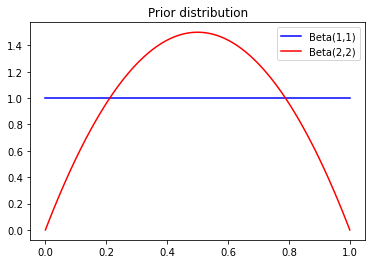

In [4]:
plt.plot(x, stats.beta.pdf(x,1,1), color = "blue", label = "Beta(1,1)") #beta(1,1)은 uniform 분포 f(x)=1 alpha=beta=1
plt.plot(x, stats.beta.pdf(x,2,2), color = "red", label = "Beta(2,2)")
plt.title("Prior distribution")
plt.legend()
plt.show()

3. $\theta$ 의 사후분포는 어떤 분포 형태를 갖는가? 
$$ \theta \sim Beta(\alpha, \beta)$$
$$ X|\theta \sim Bin(16, \theta)$$
$$ \theta|X \sim ??$$

$숙제: Beta(\alpha+13, \beta+3)$

#### P(𝜃|𝑋) ∝ Beta(𝛼 + x, 𝛽 + 16 - x)
#### -> P(𝜃|𝑋) ∝ Beta(𝛼+13, 𝛽+3)

4. $Beta(1,1)$과 $Beta(2,2)$ prior를 사용할 때 posterior distrbution의 pdf를 함께 그리시오.

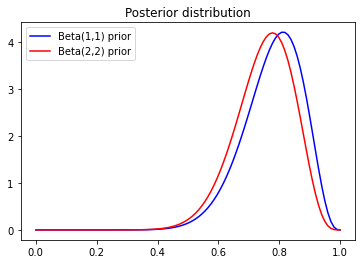

In [5]:
plt.plot(x, stats.beta.pdf(x,1+13,1+3), color = "blue", label = "Beta(1,1) prior")
plt.plot(x, stats.beta.pdf(x,2+13,2+3), color = "red", label = "Beta(2,2) prior")
plt.title("Posterior distribution")
plt.legend()
plt.show()

5. 두 posterior 분포에서 random sample을 10000개 추출하여 $\theta$의 posterior mean, std를 계산하고 $\sqrt{\theta}$의 평균을 구하시오. 

In [6]:
np.random.seed(0)

In [7]:
# posterior: beta(14,4) -> mean: 14/(14+4) 이론적인 posterior mean
np.random.seed(0)
x1 = stats.beta.rvs(14,4, size=10000)

In [8]:
x1.mean(), x1.std()

(0.779537174207455, 0.09477370756082433)

In [9]:
14/(14+4)

0.7777777777777778

In [10]:
a=14
b=4
np.sqrt(a*b / ((a+b)**2 * (a+b+1)))

0.09537723058655023

In [11]:
# posterior: beta(15,5) -> mean: 15/(15+5) 이론적인 posterior mean
np.random.seed(0)
x2 = stats.beta.rvs(15,5, size=10000)
x2.mean(), x2.std()

(0.750866299163891, 0.09407828291115325)

In [12]:
15/(15+5)

0.75

In [13]:
a=15
b=5
np.sqrt(a*b / ((a+b)**2 * (a+b+1)))

0.0944911182523068